In [8]:
import networkx as nx
import pickle

import numpy as np; np.set_printoptions(suppress=True, linewidth=180)
import pandas as pd; pd.set_option('display.width', 500)

from plot_module import plot_ode_results, plot_sde_results, plot_simulator_graph, plot_neuron_graph_subset
from sim_param_from_network import names_from_network, sde_param_from_network, ode_from_network, start_state_from_nodes
from neuron_graph_process import neuron_graph_process
from neuron_graph_bioparam import add_bioparam_attributes
from neuron_graph_helper import load_pickled_neuron_graph

## Model 0: Two compartments, both with active population control


>> Adding biological parameters to the network
> Adjusting soma nss to 200 in order to spread total population of 400 across 2 nodes.


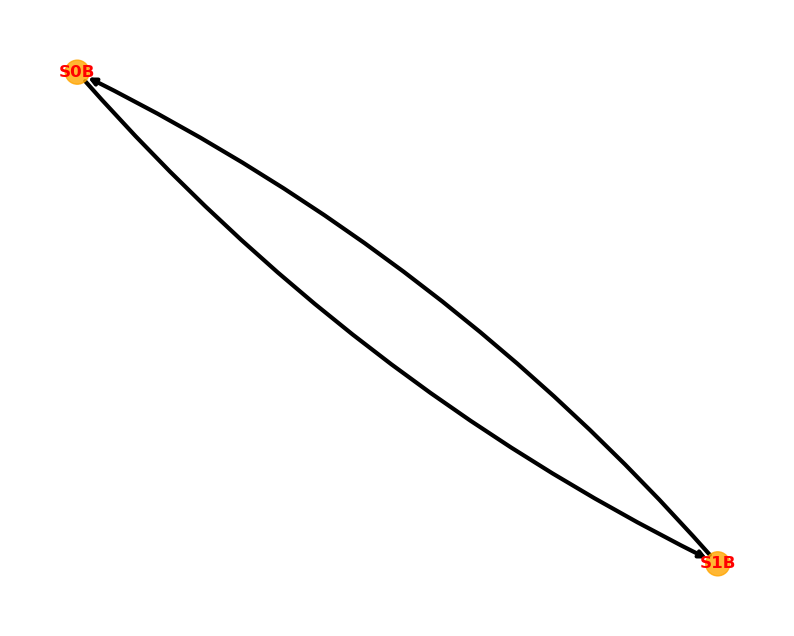


> Edges in the graph:
S0B-S1B: {'edgetype': 1, 'volume': 200, 'len': 1, 'rate': 0.4}
S1B-S0B: {'edgetype': 1, 'volume': 200, 'len': 1, 'rate': 0.4}

> Nodes in the graph:
S0B: {'nodetype': 1, 'volume': 200, 'radius': 1, 'xy': (0, 0), 'birth_type': 2, 'c_b': 0.01, 'birth_rate': 0.4, 'death_rate': 0.4, 'nss': 200.0, 'delta': 0.25}
S1B: {'nodetype': 1, 'volume': 200, 'radius': 1, 'xy': (0, 0), 'birth_type': 2, 'c_b': 0.01, 'birth_rate': 0.4, 'death_rate': 0.4, 'nss': 200.0, 'delta': 0.25}


In [18]:
bio_param = {
    # global parameters    
    'delta': 0.25, 
    
    # soma parameters
    'soma_death_rate': 0.4, 
    'soma_mito_density': 2,
    'soma_cb': 0.01, 
    'soma_br': 0.4, 
    'soma_diffusion': 0.4,
    'soma_nss': 400,
    }

G = nx.DiGraph()
G.add_node('S0B', nodetype = 1, volume = 200, radius = 1, xy = (0,0))
G.add_node('S1B', nodetype = 1, volume = 200, radius = 1, xy = (0,0))
G.add_edge('S0B','S1B', edgetype = 1, volume = 200, len = 1)
G.add_edge('S1B','S0B', edgetype = 1, volume = 200, len = 1)

add_bioparam_attributes(G, bio_param)
plot_simulator_graph(G)

print('\n> Edges in the graph:')
for u, v, data in G.edges(data = True): print(f'{u}-{v}: {data}')
print('\n> Nodes in the graph:')
for node, data in G.nodes(data = True): print(f'{node}: {data}')

with open(f'neuron_graphs/model_0.pkl', 'wb') as f:
    pickle.dump(G, f)